In [127]:
from bowzer.utils import get_models, view_model_performance, compare_model_loss

Loading: model_store/trained_20241023/model_163515/model_epochs_50_performance.json
Loading: model_store/trained_20241023/model_162315/model_epochs_25_performance.json
Loading: model_store/trained_20241023/model_161655/model_epochs_10_performance.json
Loading: model_store/trained_20241023/model_161345/model_epochs_5_performance.json


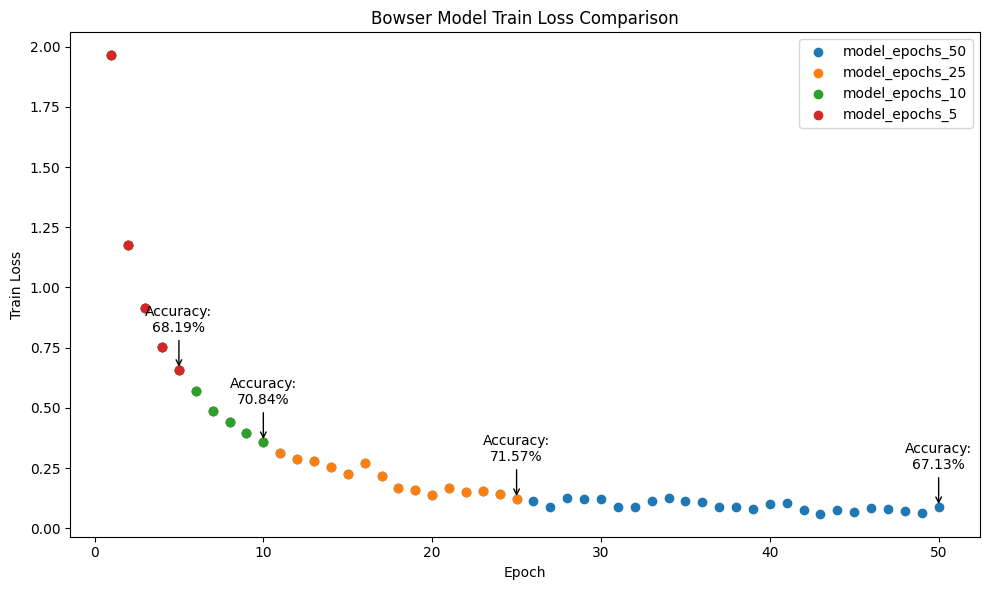

In [128]:
overfit_models = get_models()
compare_model_loss(overfit_models)

Loading: model_store/trained_20241023/model_163515/model_epochs_50_performance.json


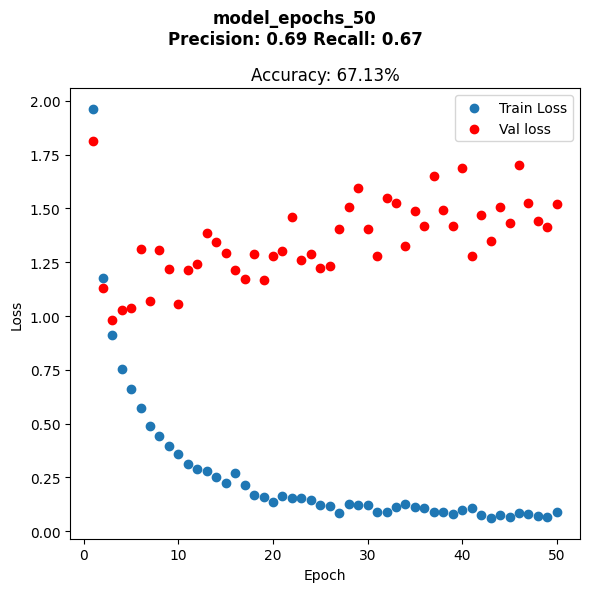

In [116]:
target_show_model = 'model_epochs_50'
view_model_performance(target_show_model, f"{overfit_models[target_show_model]}_performance.json")

# Better Models include Guassian Blur and Random Resize Crop

Loading: model_store/trained_20241025/model_163502/model_epochs_10_performance.json
Loading: model_store/trained_20241025/model_164538/model_epochs_50_performance.json
Loading: model_store/trained_20241025/model_162739/model_epochs_5_performance.json


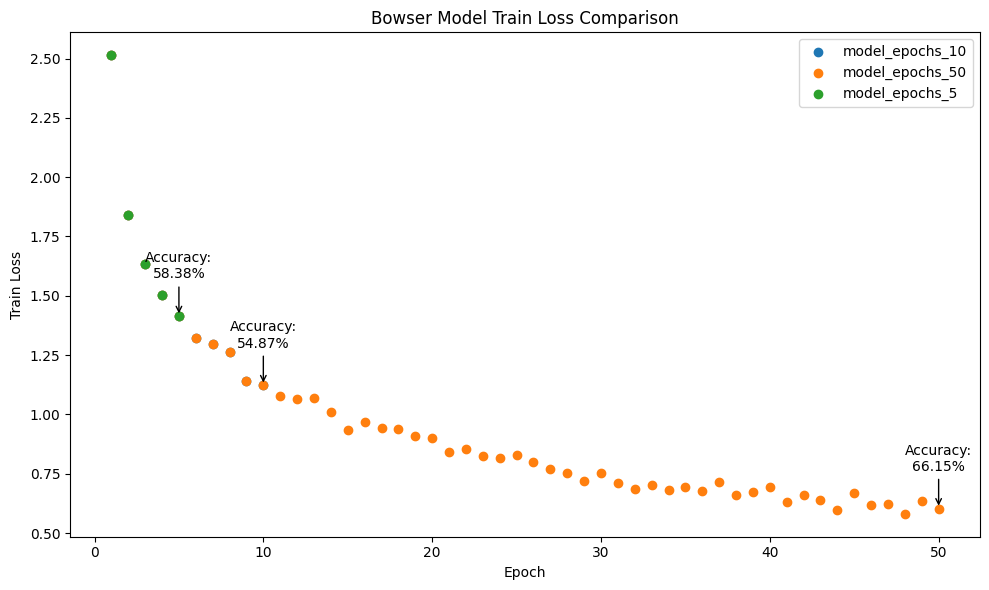

In [134]:
better_models = get_models("model_store/trained_20241025/")
compare_model_loss(better_models)

Loading: model_store/trained_20241025/model_164538/model_epochs_50_performance.json


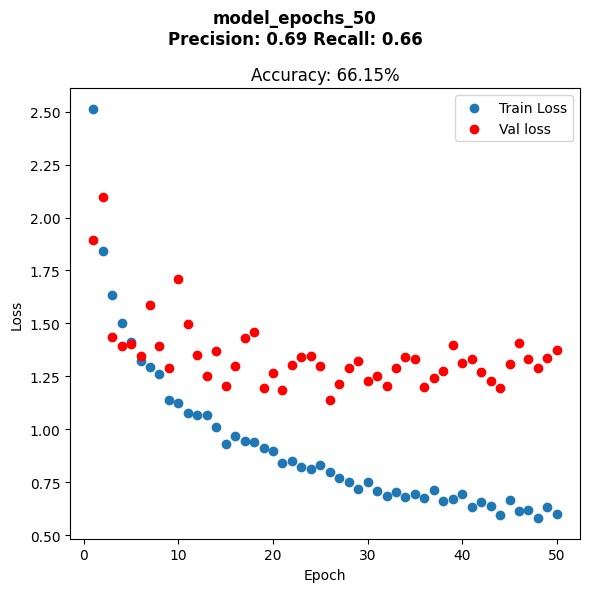

In [135]:
target_show_model = 'model_epochs_50'
view_model_performance(target_show_model, f"{better_models[target_show_model]}_performance.json")

Loading: model_store/trained_20241023/model_163515/model_epochs_50_performance.json
Loading: model_store/trained_20241025/model_164538/model_epochs_50_performance.json


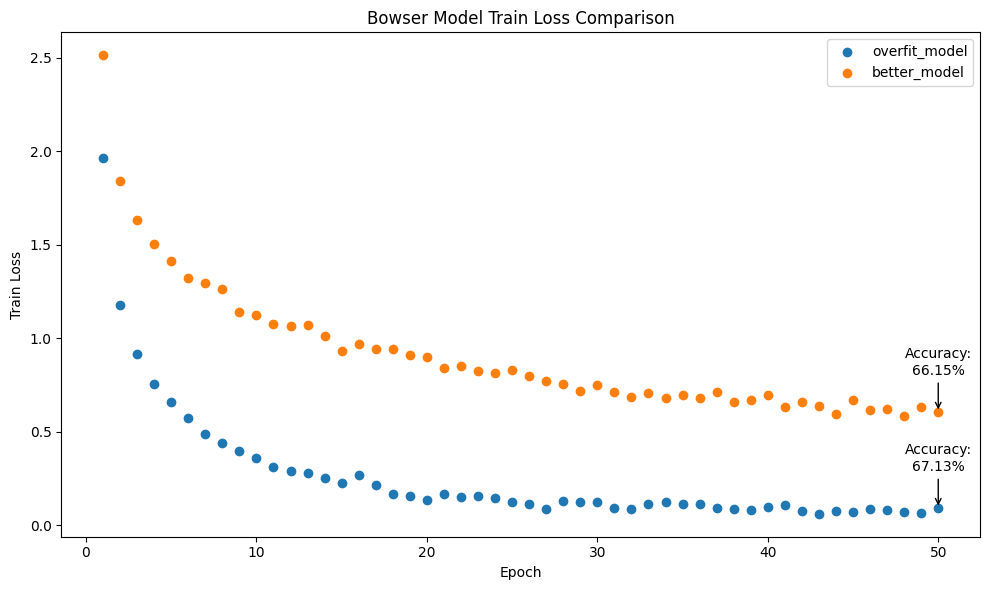

In [126]:
compare_model_loss({
    'overfit_model':overfit_models['model_epochs_50'],
    'better_model':better_models['model_epochs_50']
})

Loading: model_store/trained_20241023/model_161655/model_epochs_10_performance.json
Loading: model_store/trained_20241025/model_163502/model_epochs_10_performance.json


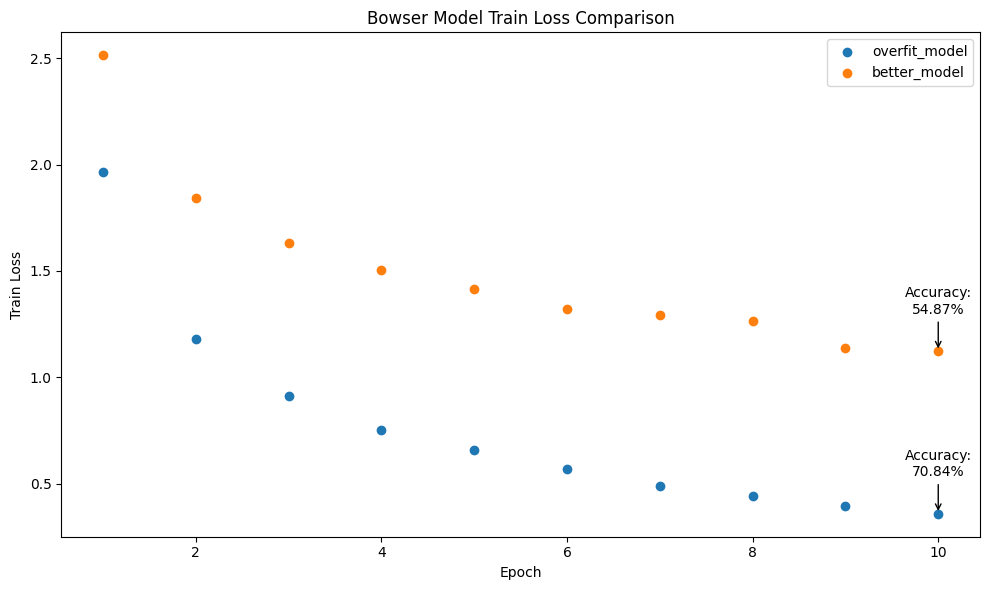

In [137]:
compare_model_loss({
    'overfit_model':overfit_models['model_epochs_10'],
    'better_model':better_models['model_epochs_10']
})